<a href="https://colab.research.google.com/github/hamsika04/6thSem-ML-Lab/blob/main/1BM22CS054_Lab_8_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy with n_estimators=10: 1.0000


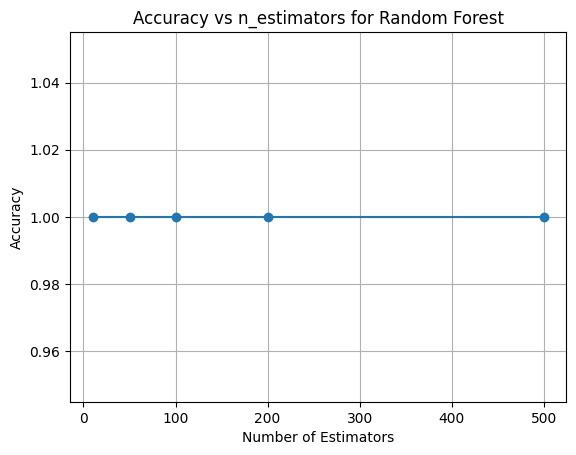

Best n_estimators: 10 with accuracy: 1.0000


In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Step 2: Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train RandomForestClassifier with default n_estimators=10
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred_default = rf_default.predict(X_test)

# Step 5: Calculate the accuracy score for default model
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with n_estimators=10: {accuracy_default:.4f}")

# Step 6: Fine-tune the model by adjusting n_estimators
n_estimators_range = [10, 50, 100, 200, 500]
accuracy_scores = []

# Loop through different values of n_estimators
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Step 7: Plot the accuracy scores for different n_estimators
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators for Random Forest')
plt.grid(True)
plt.show()

# Step 8: Display the best n_estimators and its corresponding accuracy score
best_n_estimators = n_estimators_range[accuracy_scores.index(max(accuracy_scores))]
best_accuracy = max(accuracy_scores)
print(f"Best n_estimators: {best_n_estimators} with accuracy: {best_accuracy:.4f}")


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
print("Loading dataset...")
df = pd.read_csv("train.csv")

# Display basic information
print("\nDataset information:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

# Define features and target
print("\nPreparing features and target variable...")
X = df.drop('Survived', axis=1)
y = df['Survived']

# Drop non-predictive columns
X = X.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values in 'Embarked'
if X['Embarked'].isna().any():
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

# Define feature types
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']
categorical_features = ['Sex', 'Embarked']

# Preprocessing pipelines
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Train the model
print("\nTraining Random Forest model...")
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Loading dataset...

Dataset information:
Shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000